In [1]:
# Import:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from toolbox.experiment import Experiment
from toolbox.SINDy import SINDy
from toolbox.symbolic_SINDy import symbolic_SINDy
from toolbox.cusum import CUSUM
from toolbox.auxiliary_functions import set_param_freq
from data import SINDy_data, equations

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [ ]:
# Select ODE:
ode_name = 'TVLvODE2_d'
ode_param = "1.,-0.1,-1.5,0.075"
freq = 20
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

# Parameters:
freq_SR = 20
n_sample = 50 
noise_ratio = 0.01
seed = 100 
n_seed = 1 
dt = 1 / freq
dim_x = 3
dim_k = 0
SW_length = 10 # SINDy sliding window length
SW_length_SR = 10 # SR sliding window length
H = 80 # length of the experiment
lazy = False # if True, we do not recompute the building blocks with SR
symbolic = True # if True, SR call is allowed, otw. simple SINDy is used throughout the whole experiment

# CUSUM parameters:
N = 10 # 10
eps = 0.1
threshold = 1.

In [ ]:
# Generate data: (18min 27.8sec)
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, H)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# Save data:
file_path = 'saved/data/TVLvODE2_d_data.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

In [3]:
# Load data:
file_path = 'saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [4]:
# Initialize experiment and model discovery methods:
exp = Experiment(ode, ode_param, freq_SR, n_sample, noise_ratio, seed, n_seed, dt, dim_x, dim_k, SW_length, SW_length_SR, H, lazy, symbolic)

cusum = CUSUM(N, eps, threshold)

SINDy_method = SINDy(degree=2, include_bias=True, threshold=0.07)

SR_method = 'D-CODE' # symbolic regression method chosen 
x_id = 0  # equation to be identified by SR 
symbolic_SINDy_method = symbolic_SINDy(SR_method, x_id=0, degree=2, product=True, threshold=0.07, penalty=10, max_patience=6)

In [5]:
# Run the experiment:

while exp.T <= exp.H:

    print(f't: {exp.T}')

    # update time-window:
    X_list_t = [x[(exp.T0*freq):(exp.T*freq)] for x in X_list]
    dX_list_t = [dx[(exp.T0*freq):(exp.T*freq)] for dx in dX_list]  

    exp.step_forward(SINDy_method, symbolic_SINDy_method, cusum, X_list_t, dX_list_t, param_list, feature_names, CP_threshold=0.8)

    # building block search time: .m .s
    # total time: 37m 16.6s

t: 10
SINDy model:
(X0)' = 0.999 X0 + -0.100 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model complexity:  5
Lasso penalty:  3.6694125580980956
RMSE:  0.05763319899286964

t: 11
Time:  11
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.058722759422767244

t: 12
Time:  12
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.05671013803932434

t: 13
Time:  13
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.0552671560047436

t: 14
Time:  14
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.056193302434709845

t: 15
Time:  15
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.05572415988958542

t: 16
Time:  16
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.05626616518833173

t: 17
Time:  17
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.05870187273381276

t: 18
Time:  18
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.05814922610545011



/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.502 1 + 1.031 X0 + -0.101 X0 X1 + 4.565 sin(5.029826300863592*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.202 1 + 1.013 X0 + -0.100 X0 X1 + 1.819 sin(5.006934060683674*X2) + 0.174 X2 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1.4928229548271075, 1.4389906721295078, 1.4389906721295078, 111.08493289632095, 1.6690995070208647, 0.4700977045442366]

Best building block:
['sin(5.006934060683674*X2)']

Smart-SINDy model:
(X0)' = -0.202 1 + 1.013 X0 + -0.100 X0 X1 + 1.819 sin(5.006934060683674*X2) + 0.174 X2 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  5.882220260068241
RMSE:  0.403597710048673

t: 31
Time:  31
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5071898581849926

t: 32
Time:  32
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.8107034172064249

t: 33
Time:  33
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 23 , 33 ]

Searching for the best building block:
Model:
(X0)' = -0.099 1 + 1.028 X0 + -0.102 X0 X1 + 0.265 sin(X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model:
(X0)' = -0.100 1 + 1.029 X0 + -0.103 X0 X1 + 0.366 sin(sin(sin(X2)))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model:
(X0)' = -0.106 1 + 1.024 X0 + -0.102 X0 X1 + 0.111 sin(X0)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model:
(X0)' = -0.083 1 + 1.024 X0 + -0.102 X0 X1 + 0.380 sin(sin(X1))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model:
(X0)' = -0.083 1 + 1.024 X0 + -0.102 X0 X1 + 0.329 sin(X1)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.99

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.763 1 + 1.057 X0 + -0.101 X0 X1 + 3.456 sin(5.029826300863592*X2) + 0.218 X0 sin(5.029826300863592*X2) + -0.115 X2 sin(5.029826300863592*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model:
(X0)' = -0.390 1 + 1.027 X0 + -0.101 X0 X1 + 0.245 sin(5.006934060683674*X2) + 0.325 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
errors:  [1.0085335309901524, 1.033677674735758, 1.178007724309635, 1.4295895404816144, 1.42671235182005, 94.02774698653403, 5.479403184251541, 1.0556926961267044]

Best building block:
['sin(X2)']

Smart-SINDy model:
(X0)' = -0.099 1 + 1.028 X0 + -0.102 X0 X1 + 0.265 sin(X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model complexity:  7
Lasso penalty:  4.06689583496956
RMSE:  0.7101260729354449

t: 34
Time:  34
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  1.0891105706574904

t: 35
Time:  35
CUSUM quantity:  0
CUSUM quantity:  0
Change point: 

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.784 1 + 1.060 X0 + -0.101 X0 X1 + 3.413 sin(5.029826300863592*X2) + 0.210 X0 sin(5.029826300863592*X2) + -0.109 X2 sin(5.029826300863592*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.998 1
Model:
(X0)' = -0.401 1 + 1.031 X0 + -0.101 X0 X1 + 0.264 sin(5.006934060683674*X2) + 0.324 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.998 1
errors:  [1000, 1000, 1.248937051452119, 1.3244350883118612, 1.3224274908650455, 89.38187096208445, 3.826320334274053, 0.7910008724748844]

Best building block:
['sin(5.006934060683674*X2)']

Smart-SINDy model:
(X0)' = -0.401 1 + 1.031 X0 + -0.101 X0 X1 + 0.264 sin(5.006934060683674*X2) + 0.324 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.998 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  4.691247014715212
RMSE:  0.5089570002219036

t: 36
Time:  36
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5374977457969426

t: 37
Time:  37
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.530785679142358

t: 38
Time:  38
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5310006523897124

t: 39
Time:  39
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.6143461730621291

t: 40
Time:  40
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.4829637463997619

t: 41
Time:  41
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5292512426387226

t: 42
Time:  42
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.558635916806821

t: 43
Time:  43
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5912027045119197

t: 44
Time:  44
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5253616321942777

t: 45
Time:

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 1.032 19.510208133088749 + -0.097 X1 19.510208133088749
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -23.502 1 + 1.023 X0 + 0.457 X2 + -0.095 X0 X1 + 15.993 sin(5.029826300863592*X2) + -0.304 X2 sin(5.029826300863592*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 0.393 1 + -1.861 X1 + 0.383 X2 + 3.195 sin(5.006934060683674*X2) + 0.356 X0 sin(5.006934060683674*X2) + -0.072 X2 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1000, 1000, 1000, 799.514313111162, 1000, 8.065816548119399]

Best building block:
['sin(5.006934060683674*X2)']

Smart-SINDy model:
(X0)' = 0.393 1 + -1.861 X1 + 0.383 X2 + 3.195 sin(5.006934060683674*X2) + 0.356 X0 sin(5.006934060683674*X2) + -0.072 X2 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  9
Lasso penalty:  8.833348528348461
RMSE:  1.6909767336849995

t: 57
Time:  57
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 47 , 57 ]

Searching for the best building block:
Model:
(X0)' = -31.103 1 + 1.020 X0 + 0.601 X2 + -0.095 X0 X1 + -21.753 sin(X2) + 0.435 X2 sin(X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -32.931 1 + 1.059 X0 + 0.071 X1 + 0.617 X2 + -0.098 X0 X1 + -31.095 sin(sin(sin(X2))) + 0.072 X0 sin(sin(sin(X2))) + 0.080 X1 sin(sin(sin(X2))) + 0.575 X2 sin(sin(sin(X2)))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.190 1 + 1.050 X0 + 0.075 X1 + 0.411 X2 + -0.097 X0 X1 + 0.202 sin(X0)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -21.979 1 + 1.050 X0 + 0.078 X1 + 0.406 X2 + -0.097 X0 X1 + -0.456 sin(sin(X1))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -21.981 1 + 1.050 X0 + 0.079 X1 + 0.406 X2 + -0.097 X0 X1 + -0.403 sin(X1)
(X1)' = -1.498 X1 + 0.075 X0 

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -2.228 1 + -1.900 X1 + 0.437 X2 + 13.815 sin(5.029826300863592*X2) + 0.102 X1 sin(5.029826300863592*X2) + -0.284 X2 sin(5.029826300863592*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -14.002 1 + 1.026 X0 + 0.260 X2 + -0.093 X0 X1 + 0.326 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1000, 1000, 1000, 82.67661736717318, 1000, 1000]


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(



Best building block:
['19.510208133088749']

Smart-SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0
RMSE:  7.944334772114374

t: 58
Time:  58
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 48 , 58 ]

Searching for the best building block:
Model:
(X0)' = -6.685 1 + 1.059 X0 + 0.079 X1 + 0.111 X2 + -0.097 X0 X1 + 0.387 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -0.649 1 + 1.056 X0 + 0.082 X1 + -0.097 X0 X1 + 18.350 sin(sin(sin(X2))) + -0.335 X2 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.776 1 + 1.061 X0 + 0.087 X1 + 0.129 X2 + -0.098 X0 X1 + 0.250 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.969 1 + 1.061 X0 + 0.090 X1 + 0.132 X2 + -0.098 X0 X1 + -5.657 sin(sin(X1)) + 0.098 X2 sin(sin(X1))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.964 1 + 1.061 X0 + 0.090 X1 + 0.131 X2 + -0.098 X0 X1 + -4.948 sin(X

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = -7.882 1 + 1.063 X0 + 0.095 X1 + 0.131 X2 + -0.098 X0 X1 + 12.891 sin(5.029826300863592*X2) + -0.243 X2 sin(5.029826300863592*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -6.435 1 + 1.029 X0 + 0.112 X2 + -0.092 X0 X1 + 0.143 sin(5.006934060683674*X2) + 0.318 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
errors:  [1000, 1000, 1000, 1000, 1000, 95.4517998579544, 1000, 1000]


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(



Best building block:
['19.510208133088749']

Smart-SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0
RMSE:  8.200414433335904

t: 59
Time:  59
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 49 , 59 ]

Searching for the best building block:
Model:
(X0)' = -1.009 1 + 1.069 X0 + 0.089 X1 + -0.097 X0 X1 + -0.123 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.000 1 + 1.068 X0 + 0.088 X1 + -0.097 X0 X1 + -0.091 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.007 1 + 1.069 X0 + 0.086 X1 + -0.097 X0 X1 + 0.293 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.100 1 + 1.069 X0 + 0.093 X1 + -0.097 X0 X1 + -0.427 sin(sin(X1))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.100 1 + 1.069 X0 + 0.093 X1 + -0.097 X0 X1 + -0.379 sin(X1)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -1.035 1 + 1.070 X0 + 0.094 X1 + -0.097 X0 X1 + 17.954 sin(5.029826300863592*X2) + -0.336 X2 sin(5.029826300863592*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.489 1 + 1.031 X0 + -0.091 X0 X1 + 0.145 sin(5.006934060683674*X2) + 0.315 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1.5389800709572627, 1.4767120223110808, 1.9599877329696853, 2.331019241301957, 2.3550253652833244, 106.8301501744508, 1000, 3.8360445413790565]

Best building block:
['sin(sin(sin(X2)))']

Smart-SINDy model:
(X0)' = -1.000 1 + 1.068 X0 + 0.088 X1 + -0.097 X0 X1 + -0.091 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model complexity:  8
Lasso penalty:  4.916490119640945
RMSE:  0.8457696076041771

t: 60
Time:  60
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 50 , 60 ]

Searching for additonal building blocks -> D-CODE call:

Running with: ode

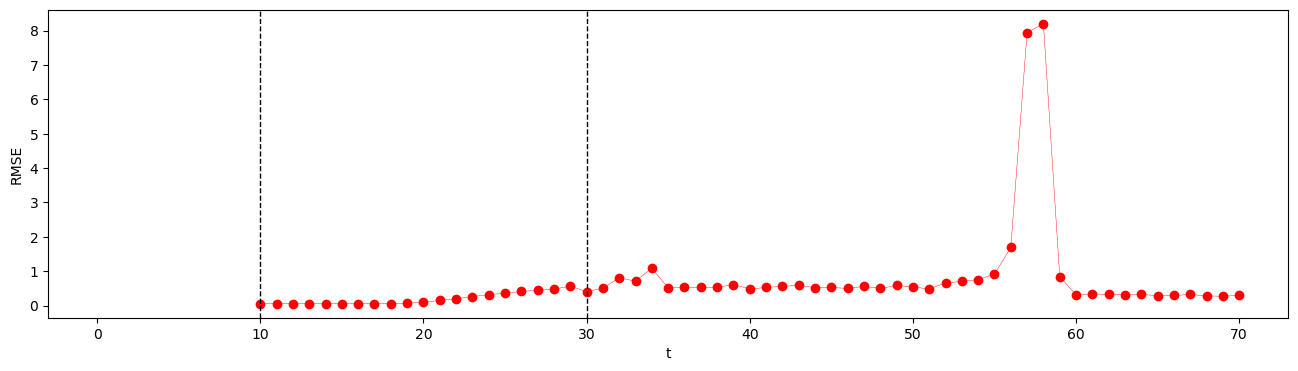

In [6]:
exp.plot_RMSE() # forse meglio in log scale

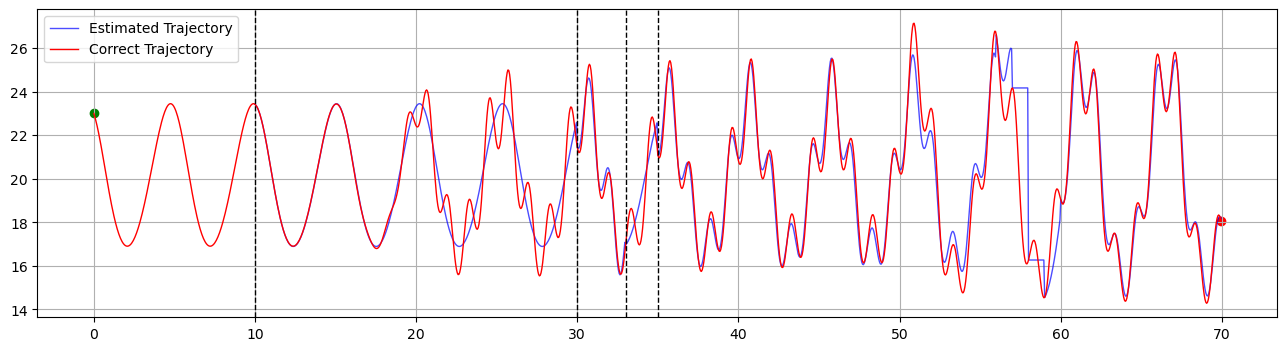

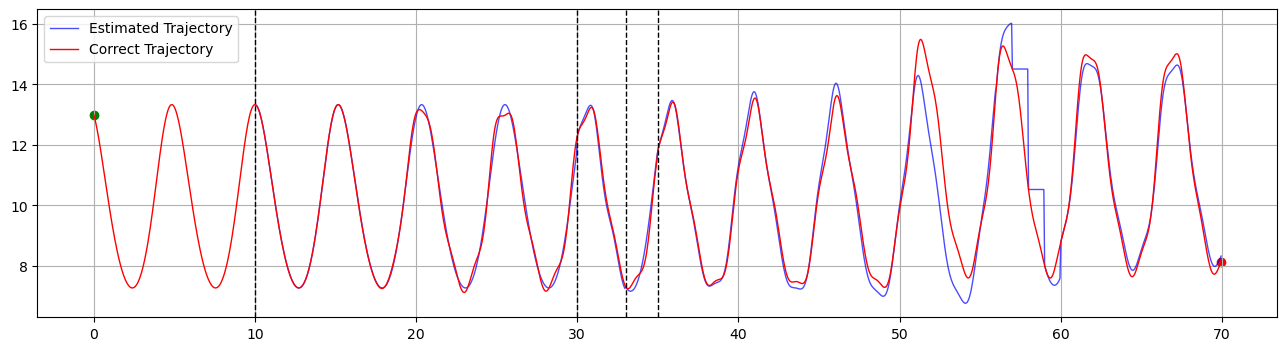

In [7]:
from data.SINDy_data import evaluate_RMSE_d, evaluate_traj_d_1D
x_id = 0

plot_times_1 = exp.turning_points.copy() 
plot_models_1 = exp.model_history.copy()
plot_times_1.append(exp.H)
plot_models_1.insert(0, plot_models_1[0])

xt_true = []
pred_list = []
time_vector_1 = np.arange(0, plot_times_1[-1], exp.dt)
time_vector_2 = np.arange(plot_times_1[1], plot_times_1[-1], exp.dt)
for i in range(len(plot_models_1)):
    xt_true_i, pred_i = evaluate_traj_d_1D(plot_models_1[i], exp.ode, 20, 1, [23, 11, 0], [23, 11, 0], plot_times_1[i], plot_times_1[i+1], x_id, exp.dim_x, exp.dim_k, plot=False)
    if i == 0:
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
    else: 
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
        pred_list = np.concatenate((pred_list, pred_i), axis = 0)


fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(time_vector_2, pred_list, color='blue', linewidth=1.0, alpha=0.7, label='Estimated Trajectory')
ax.plot(time_vector_1, xt_true, color='red', linewidth=1.0, label='Correct Trajectory')
ax.scatter(time_vector_1[-1], xt_true[-1], color='red')
ax.scatter(time_vector_1[0], xt_true[0], color='green')
ax.legend()
ax.grid()
for x in [plot_times_1[1], plot_times_1[2], plot_times_1[3], plot_times_1[4]]: 
    ax.axvline(x=x, color='black', linestyle='--', linewidth=1.0, label='Vertical Line' if x == 1 else "")



x_id = 1

plot_times_1 = exp.turning_points.copy() 
plot_models_1 = exp.model_history.copy()
plot_times_1.append(exp.H)
plot_models_1.insert(0, plot_models_1[0])

xt_true = []
pred_list = []
time_vector_1 = np.arange(0, plot_times_1[-1], exp.dt)
time_vector_2 = np.arange(plot_times_1[1], plot_times_1[-1], exp.dt)
for i in range(len(plot_models_1)):
    xt_true_i, pred_i = evaluate_traj_d_1D(plot_models_1[i], exp.ode, 20, 1, [18, 13, 0], [18, 13, 0], plot_times_1[i], plot_times_1[i+1], x_id, exp.dim_x, exp.dim_k, plot=False)
    if i == 0:
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
    else: 
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
        pred_list = np.concatenate((pred_list, pred_i), axis = 0)


fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(time_vector_2, pred_list, color='blue', linewidth=1.0, alpha=0.7, label='Estimated Trajectory')
ax.plot(time_vector_1, xt_true, color='red', linewidth=1.0, label='Correct Trajectory')
ax.scatter(time_vector_1[-1], xt_true[-1], color='red')
ax.scatter(time_vector_1[0], xt_true[0], color='green')
ax.legend()
ax.grid()
for x in [plot_times_1[1], plot_times_1[2], plot_times_1[3], plot_times_1[4]]:  
    ax.axvline(x=x, color='black', linestyle='--', linewidth=1.0, label='Vertical Line' if x == 1 else "")

Commento dei risultati:
- Scelta del modello -> per essere beccata la dinamica deve essere chiara alla SR, non confusa con rumore e determinante nella traiettoria. Variazioni lente dei parametri non possono essere mai beccate su finestre temporali ragionevoli con questo problema.
- Scelta numero di generazioni -> avere migliore stima delle costanti: la dinamica tra 5.028 e 5.007 è completamente diversa in termini di rmse
- Testata la capacità di aggiustarsi anche quando fitta modelli  piu o meno sbagliati influenzati da transitori: se il building block ce prima o poi la dinamica vera viene catturata
- Lo switch -> mette in crisi il modello perche causa un transitorio -> prova a fittare un modello con i blocchi che ha (che sono giusti) ma non ne trova mai un modello capace di spiegare la dinamica. questo forza il modello a cercare nuovi blocchi, abbastanza lontano dal transitorio li ritrova e si sistema.
- Lo switch è stato introdotto per testare la capacità della SR di ritrovare trovare il blocco mancante. In generale si osserva che in base al punto di ricerca non sempre trova il blocco corretto

- T = 56: sin(0.5008226879169348*X2) -> NON TROVA patience = 4
- T = 57: sin(5.85685419176154*X2) -> NON TROVA patience = 5
- T = 58: sin(5.068949033687468*sin(X2)) patience = 6
- T = 59: sin(5.448175735771112*sin(X2)) patience = 7
- T = 60 QUI trova tanti blocchi potenziali

- sin(4.997271008241834*X2)
- sin(5.102140407099291*X2)
- sin(5.010848520737575*X2)

- T = 61: sin(5.33594343872588*X2)

- per altri valori di T il blocco decisivo NON viene trovato vista la natura complessa del problema. Tipicamente viene trovato nella prossimita dell'intervalli decimali in cui non cerca anche sfasamenti

- Nota inoltre che anche se da un punto di vista teorico gli altri blocchi trovati restituiscono soluzioni che sono concettualmente corrette per descrivere la dinamica (a volte 5.028, altre 5.20), capita che gli altri blocchi trovati da SR generino localmente con RMSE piu basso e vengono preferite sistematicamente, ma i questi modelli fittati non sono affatto stabili: ogni 2 secondi ce una nuova ricerca del blocco tra quelli disponibili, ma quelli 'giusti' continuano a generare errori troppo alti

- Esperimento positivo che spiega la forza dell'approcio: è stato identificato un termine che a priori non verrebbe mai considerato in SINDy. La generalizzazione pero è obiettivamente complessa. bisogna sempre valutare trade off tra finestra temporale, pazienza e fit -> realisticamente è difficile trovare in modo obiettivo un buon compromesso. Inoltre aggiungendo ulteriore rumore l'identificazione diventa ancora piu complessa.

- Nota infine che la SR non riesce mai da sola a beccare la dinamica corretta, tende sempre a overfittare questa traiettoria. Da qui l'idea di alzare la regolarizzazione sul fit: avere meno blocchi ma determinanti. Fortunatamente poi, estraendo i building blocks e regolarizzando con SINDy riusciamo a ottenere una soluzione parsimoniosa e interpretabile del fenomeno, che si avvicina notevolmente alla dinamica ground truth.

- Nota sulla costante trovata nei modelli di SINDt: seppur piccola, e limitata dall'altro termine in piu in fase con l'oscillazione, sul lungo periodo fa in modo che ogni ciclo la traiettoria stimata si allarghi leggermente.